<a href="https://colab.research.google.com/github/abigailayimbisa/weight-biases-assignment/blob/main/Weight_and_biases_(_logistic_regression%26Decision_tree_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/urlset(m).csv", encoding='ISO-8859-1')
data


<ipython-input-2-f0b112cf730d>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/urlset(m).csv", encoding='ISO-8859-1')


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95908,xbox360.ign.com/objects/850/850402.html,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95909,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95910,www.gamespot.com/xbox360/action/deadspace/,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95911,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
#find shape of data
data.shape

(95913, 14)

In [ ]:
#check the null data set
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95913 entries, 0 to 95912
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95913 non-null  object 
 1   ranking        95913 non-null  int64  
 2   mld_res        95913 non-null  int64  
 3   mld.ps_res     95913 non-null  int64  
 4   card_rem       95913 non-null  float64
 5   ratio_Rrem     95913 non-null  float64
 6   ratio_Arem     95913 non-null  float64
 7   jaccard_RR     95913 non-null  float64
 8   jaccard_RA     95913 non-null  float64
 9   jaccard_AR     95913 non-null  float64
 10  jaccard_AA     95913 non-null  float64
 11  jaccard_ARrd   95913 non-null  float64
 12  jaccard_ARrem  95913 non-null  object 
 13  label          95911 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 10.2+ MB


In [ ]:
data.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [ ]:
data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,label
count,9.591300e+04,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95911.000000
mean,5.888620e+06,0.455611,0.202569,4.575531,135.263722,138.553966,0.004011,0.003769,0.003368,0.003645,0.307750,0.499442
std,4.878432e+06,0.498028,0.403340,4.369320,160.992943,175.485390,0.028747,0.024478,0.023795,0.028260,0.363084,0.500002
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.546700e+04,0.000000,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+07,0.000000,0.000000,3.000000,104.076923,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.333333,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000
max,1.000000e+07,1.000000,11.000000,151.909091,5507.000000,6097.000000,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull()
#checking for missing values

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95908,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95909,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95910,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95911,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            2
dtype: int64

In [ ]:
data = data.drop(columns=['domain'])

In [ ]:
data

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95908,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95909,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95910,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95911,6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95913 entries, 0 to 95912
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        95913 non-null  int64  
 1   mld_res        95913 non-null  int64  
 2   mld.ps_res     95913 non-null  int64  
 3   card_rem       95913 non-null  float64
 4   ratio_Rrem     95913 non-null  float64
 5   ratio_Arem     95913 non-null  float64
 6   jaccard_RR     95913 non-null  float64
 7   jaccard_RA     95913 non-null  float64
 8   jaccard_AR     95913 non-null  float64
 9   jaccard_AA     95913 non-null  float64
 10  jaccard_ARrd   95913 non-null  float64
 11  jaccard_ARrem  95913 non-null  object 
 12  label          95911 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 9.5+ MB


In [ ]:
column_counts = data.count()
print(column_counts)

ranking          95913
mld_res          95913
mld.ps_res       95913
card_rem         95913
ratio_Rrem       95913
ratio_Arem       95913
jaccard_RR       95913
jaccard_RA       95913
jaccard_AR       95913
jaccard_AA       95913
jaccard_ARrd     95913
jaccard_ARrem    95913
label            95911
dtype: int64


In [ ]:
data.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            2
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [ ]:
data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,label
count,9.591100e+04,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000
mean,5.888741e+06,0.455610,0.202459,4.573886,135.262910,138.554841,0.004011,0.003769,0.003368,0.003645,0.307748,0.499442
std,4.878412e+06,0.498028,0.401834,4.343259,160.994495,175.486561,0.028747,0.024479,0.023795,0.028260,0.363083,0.500002
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.547100e+04,0.000000,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+07,0.000000,0.000000,3.000000,104.043478,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.316666,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000
max,1.000000e+07,1.000000,1.000000,58.000000,5507.000000,6097.000000,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000


<Axes: >

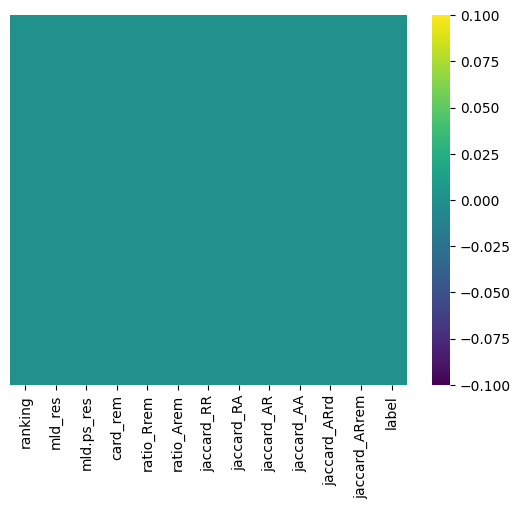

In [ ]:
#draw the heat map
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<ipython-input-19-40b52873825e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='magma')


<Axes: xlabel='label', ylabel='count'>

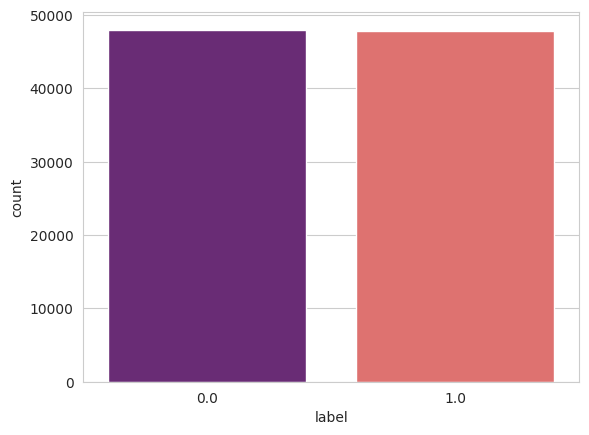

In [ ]:
#draw a countplot
sns.set_style('whitegrid')
sns.countplot(x='label', data=data, palette='magma')

<Axes: xlabel='label', ylabel='count'>

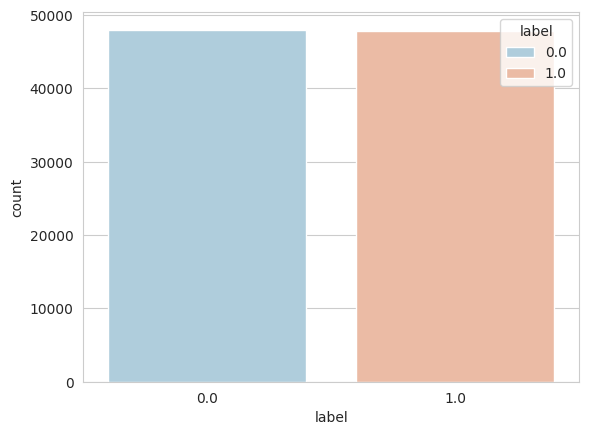

In [ ]:
#draw another countplot
sns.set_style('whitegrid')
sns.countplot(x='label', hue='label',data=data, palette='RdBu_r')

<Axes: >

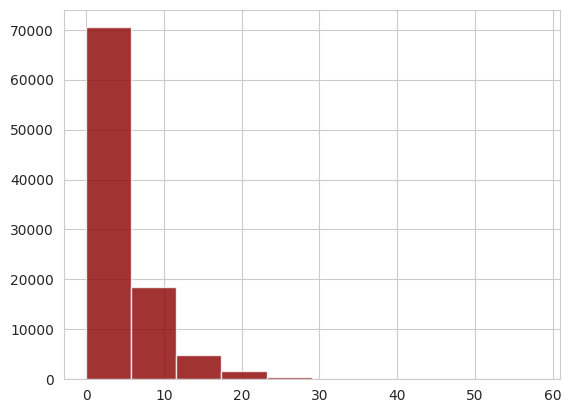

In [ ]:
#draw hsitogram
data['card_rem'].hist(bins=10, color='darkred', alpha=0.8)

<Axes: xlabel='mld.ps_res', ylabel='count'>

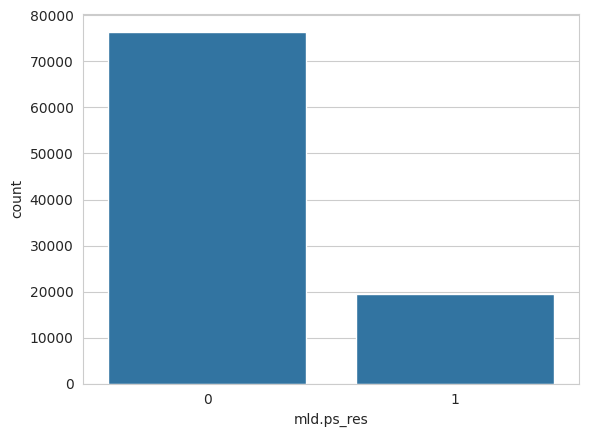

In [ ]:
#draw a countplot
sns.countplot(x='mld.ps_res', data=data)

In [ ]:
#import the sklearn
from sklearn.model_selection import train_test_split

In [ ]:
non_numeric_data = data.applymap(lambda x: isinstance(x, str))
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional, depending on your needs)
data = data.dropna()

In [ ]:
#divide data into train and test
X_train,X_test,Y_train,Y_test =train_test_split(data.drop('label',axis=1),data['label'], test_size=0.2, random_state=101)

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#equate logmodel
logmodel = LogisticRegression()

In [ ]:
logmodel

LogisticRegression()

In [ ]:
#view X_train
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
32531,10000000,0,0,13.0,123.692308,121.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.787794
95716,23906,1,0,2.0,27.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.614035
29731,10000000,0,0,10.0,61.200000,59.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.831307
51843,5352,1,1,2.0,62.500000,61.500000,0.006250,0.006329,0.006667,0.006757,0.722222,0.675676
10497,10000000,0,0,7.0,177.714286,177.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.806545
...,...,...,...,...,...,...,...,...,...,...,...,...
5695,10000000,0,0,14.0,177.285714,180.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.768008
73544,937876,0,0,2.0,974.500000,1032.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.858731
83283,29586,1,1,4.0,105.500000,108.750000,0.000000,0.000000,0.000000,0.000000,0.518519,0.808017
83469,320392,1,0,6.0,145.666667,152.833333,0.006857,0.006536,0.006865,0.006543,0.857143,0.833163


In [ ]:
#Y tain
Y_train

32531    1.0
95716    0.0
29731    1.0
51843    0.0
10497    1.0
        ... 
5695     1.0
73544    0.0
83283    0.0
83469    0.0
45921    1.0
Name: label, Length: 76728, dtype: float64

In [ ]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#predictions
predictions = logmodel.predict(X_test)

In [ ]:
#predictions
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss, confusion_matrix

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      9636
         1.0       0.50      1.00      0.66      9547

    accuracy                           0.50     19183
   macro avg       0.25      0.50      0.33     19183
weighted avg       0.25      0.50      0.33     19183



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Axes(0.125,0.11;0.62x0.77)


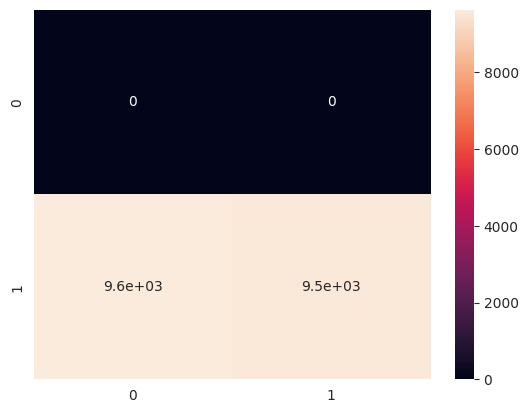

In [ ]:
#display the confusion matrix
print(sns.heatmap(confusion_matrix(predictions, Y_test), annot=True))

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

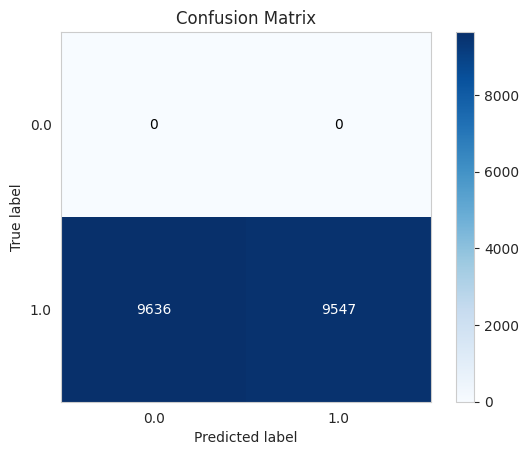

In [ ]:
skplt.metrics.plot_confusion_matrix(predictions, Y_test)
plt.show()

In [ ]:
predicted_probas = logmodel.predict_proba(X_test)

In [ ]:
predicted_probas

array([[0.49895833, 0.50104167],
       [0.29075683, 0.70924317],
       [0.49994322, 0.50005678],
       ...,
       [0.49963056, 0.50036944],
       [0.29075683, 0.70924317],
       [0.29075683, 0.70924317]])

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4976802377104728


DECISION TREE

In [ ]:
data

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,1.0
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95908,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95909,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95910,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95911,6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
from sklearn import tree

In [ ]:
X = data.drop(columns= 'label')

In [ ]:
y=data['label']

In [ ]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
95908    0.0
95909    0.0
95910    0.0
95911    0.0
95912    0.0
Name: label, Length: 95911, dtype: float64

In [ ]:
#drop null values
y.dropna()

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
95908    0.0
95909    0.0
95910    0.0
95911    0.0
95912    0.0
Name: label, Length: 95911, dtype: float64

In [ ]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
95908    0.0
95909    0.0
95910    0.0
95911    0.0
95912    0.0
Name: label, Length: 95911, dtype: float64

In [ ]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
95908,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906
95909,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623
95910,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
95911,6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['Phising','Legit'],
                              filled=True,out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 5499815.0\\nentropy = 1.0\\nsamples = 95911\\nvalue = [48009, 47902]\\nclass = Phising", fillcolor="#ffffff"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.727\\nsamples = 39847\\nvalue = [31767, 8080]\\nclass = Phising", fillcolor="#eca16b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.25\\nentropy = 0.626\\nsamples = 37467\\nvalue = [31601, 5866]\\nclass = Phising", fillcolor="#ea985e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.895\\nsamples = 2322\\nvalue = [723, 1599]\\nclass = Legit", fillcolor="#93c9f1"] ;\n2 -> 3 ;\n4 [label="entropy = 0.533\\nsamples = 35145\\nvalue = [30878, 4267]\\nclass = Phising", fillcolor="#e99254"] ;\n2 -> 4 ;\n5 [label="card_rem <= 13.5\\nentropy = 0.365\\nsamples = 2380\\nvalue = [166, 2214]\\nclass = Legit", fillcolor="#48a4e7"] ;\n1 -> 5 ;\n6 [label="entropy = 0.773\\nsample

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

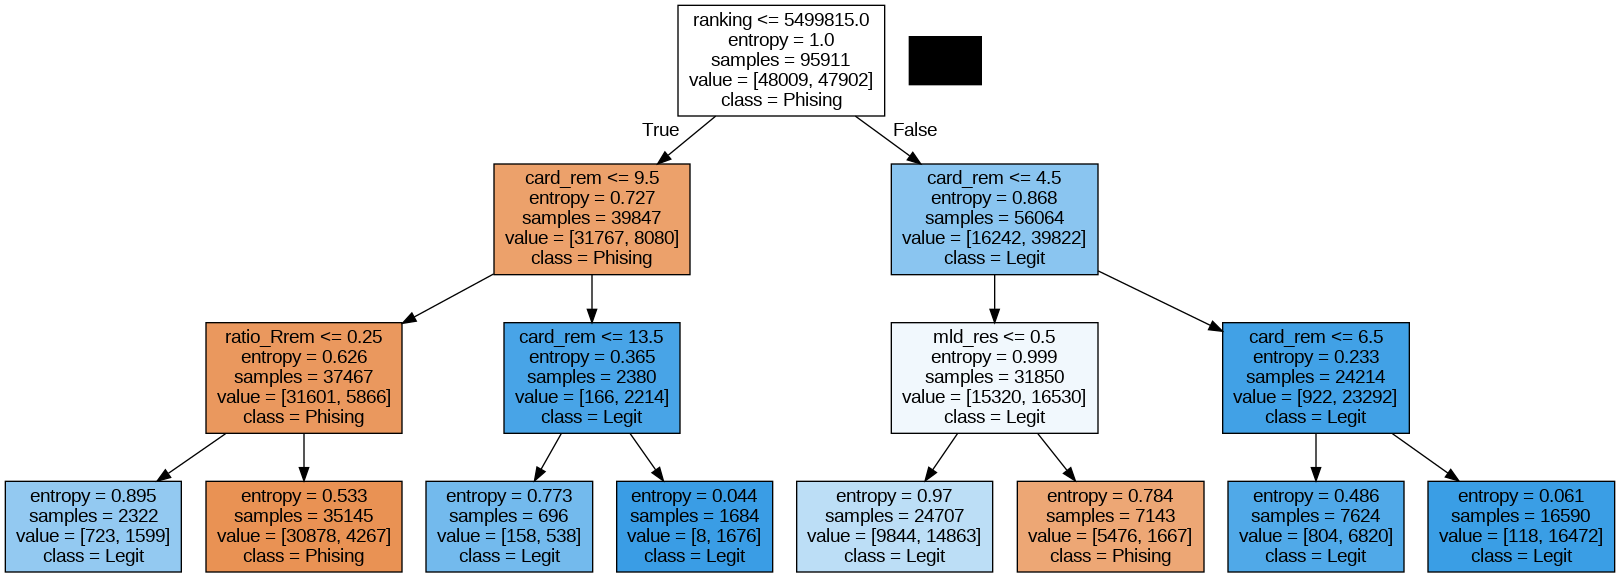

In [ ]:
graph


Image(graph.create_png())


In [ ]:
testData=[['mld.ps_res',0,0,0,0,1,1,'Phising'],
          ['samples', 1,0,0,0,1,1,'Legit'],
          ['mld_res', 1,0,0,1,1,0,'Phising'],
          ['card_rem',18,15,8,11,10,9,'Legit']]


testData

[['mld.ps_res', 0, 0, 0, 0, 1, 1, 'Phising'],
 ['samples', 1, 0, 0, 0, 1, 1, 'Legit'],
 ['mld_res', 1, 0, 0, 1, 1, 0, 'Phising'],
 ['card_rem', 18, 15, 8, 11, 10, 9, 'Legit']]

In [ ]:
data.columns

Index(['ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [ ]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.1/302.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
import wandb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
wandb.login()

wandb: Currently logged in as: ayimbisaabigail (ayimbisaabigail-usiu). Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Abigail-Weight&Biases",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

acc,▁▅▆████▇
loss,█▃▃▃▁▂▂▁
acc,0.87248
loss,0.09911


In [ ]:
pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [ ]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
#@title
import wandb
import math
import random
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = torchvision.datasets.MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

In [ ]:
# Launch 5 experiments, trying different dropout rates
for _ in range(5):
    # 🐝 initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 10,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # 🐝 Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # 🐝 Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        print(f"Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # 🐝 Close your wandb run
    wandb.finish()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 41306844.99it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1115512.14it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8252863.54it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2540070.50it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Train Loss: 0.187, Valid Loss: 0.278502, Accuracy: 0.92
Train Loss: 0.178, Valid Loss: 0.227023, Accuracy: 0.94
Train Loss: 0.092, Valid Loss: 0.199510, Accuracy: 0.94
Train Loss: 0.091, Valid Loss: 0.177461, Accuracy: 0.95
Train Loss: 0.149, Valid Loss: 0.172023, Accuracy: 0.95
Train Loss: 0.052, Valid Loss: 0.164374, Accuracy: 0.95
Train Loss: 0.020, Valid Loss: 0.156090, Accuracy: 0.95
Train Loss: 0.016, Valid Loss: 0.159357, Accuracy: 0.95
Train Loss: 0.045, Valid Loss: 0.155350, Accuracy: 0.95
Train Loss: 0.045, Valid Loss: 0.158571, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▅▆▇▇███▇▇
val/val_loss,█▅▄▂▂▂▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.04453
val/val_accuracy,0.948
val/val_loss,0.15857


Train Loss: 0.414, Valid Loss: 0.318053, Accuracy: 0.91
Train Loss: 0.390, Valid Loss: 0.269440, Accuracy: 0.92
Train Loss: 0.278, Valid Loss: 0.238608, Accuracy: 0.93
Train Loss: 0.296, Valid Loss: 0.219059, Accuracy: 0.93
Train Loss: 0.176, Valid Loss: 0.209112, Accuracy: 0.94
Train Loss: 0.177, Valid Loss: 0.200275, Accuracy: 0.94
Train Loss: 0.203, Valid Loss: 0.191801, Accuracy: 0.94
Train Loss: 0.218, Valid Loss: 0.187188, Accuracy: 0.94
Train Loss: 0.199, Valid Loss: 0.179787, Accuracy: 0.94
Train Loss: 0.231, Valid Loss: 0.174275, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▃▃▃▃▂▂▂▃▂▂▂▂▂▂▁▂▂▂▂▁▂▂▂▁▁▂▁▂▂▁▁▁▂▂▁▁▁
val/val_accuracy,▁▃▄▆▆▇▇▇██
val/val_loss,█▆▄▃▃▂▂▂▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.23093
val/val_accuracy,0.9455
val/val_loss,0.17427


Train Loss: 0.338, Valid Loss: 0.325592, Accuracy: 0.91
Train Loss: 0.401, Valid Loss: 0.271029, Accuracy: 0.92
Train Loss: 0.379, Valid Loss: 0.239646, Accuracy: 0.93
Train Loss: 0.301, Valid Loss: 0.223145, Accuracy: 0.93
Train Loss: 0.325, Valid Loss: 0.209719, Accuracy: 0.94
Train Loss: 0.274, Valid Loss: 0.202611, Accuracy: 0.94
Train Loss: 0.344, Valid Loss: 0.199532, Accuracy: 0.94
Train Loss: 0.220, Valid Loss: 0.190436, Accuracy: 0.94
Train Loss: 0.161, Valid Loss: 0.186352, Accuracy: 0.94
Train Loss: 0.104, Valid Loss: 0.190793, Accuracy: 0.94


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▁▂▂▁▂▁▁▂▁▁▂▂▁▁▂▁▁
val/val_accuracy,▁▃▄▆▆▆▇▇██
val/val_loss,█▅▄▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.10354
val/val_accuracy,0.945
val/val_loss,0.19079


Train Loss: 0.330, Valid Loss: 0.305476, Accuracy: 0.92
Train Loss: 0.335, Valid Loss: 0.244525, Accuracy: 0.92
Train Loss: 0.141, Valid Loss: 0.217632, Accuracy: 0.94
Train Loss: 0.156, Valid Loss: 0.198758, Accuracy: 0.94
Train Loss: 0.258, Valid Loss: 0.189829, Accuracy: 0.94
Train Loss: 0.164, Valid Loss: 0.172049, Accuracy: 0.95
Train Loss: 0.155, Valid Loss: 0.165623, Accuracy: 0.95
Train Loss: 0.150, Valid Loss: 0.165579, Accuracy: 0.95
Train Loss: 0.079, Valid Loss: 0.165008, Accuracy: 0.95
Train Loss: 0.052, Valid Loss: 0.157850, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▄▄▃▃▃▂▂▂▂▂▂▃▂▂▂▂▂▂▂▁▂▂▂▁▂▁▂▁▁▁▁▂▁▁▂▁▁▁▂
val/val_accuracy,▁▃▅▅▆▇██▇█
val/val_loss,█▅▄▃▃▂▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.0525
val/val_accuracy,0.9515
val/val_loss,0.15785


Train Loss: 0.241, Valid Loss: 0.290587, Accuracy: 0.91
Train Loss: 0.274, Valid Loss: 0.224887, Accuracy: 0.93
Train Loss: 0.153, Valid Loss: 0.206585, Accuracy: 0.94
Train Loss: 0.100, Valid Loss: 0.191088, Accuracy: 0.94
Train Loss: 0.150, Valid Loss: 0.181740, Accuracy: 0.94
Train Loss: 0.073, Valid Loss: 0.163889, Accuracy: 0.95
Train Loss: 0.074, Valid Loss: 0.158489, Accuracy: 0.95
Train Loss: 0.052, Valid Loss: 0.159851, Accuracy: 0.95
Train Loss: 0.081, Valid Loss: 0.162169, Accuracy: 0.95
Train Loss: 0.037, Valid Loss: 0.160952, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▄▃▃▃▂▂▂▂▁▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▅▅▆▆▇▇▇██
val/val_loss,█▅▄▃▂▁▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.03673
val/val_accuracy,0.953
val/val_loss,0.16095
